
# Book Recommendation System

This project will build a model that takes a book title as input and returns a list of 10 similar books.


## Content-based recommendations - Book recommendation system.

Machine learning can be used to build recommendation systems that recommend products such as books and movies based on other products that you like. 
Content-based recommendation systems frequently use a technique called [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to quantify similarity between products. 
Scikit-learn provides tools such as the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function to aid in building such models. 



## Load and prepare the data

Start by loading a database of 100 books  that includes information such 'url','title', 'author','rating','genre','description', as well as keywords describing the movie. 

Then use Scikit's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class to tokenize and vectorize the information, and Scikit's [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function to generate a similarity matrix.



### Install Libraries

In [10]:
#! pip install beautifulsoup4 
#! pip install requests
#! pip install pandas
#! pip install dash  plotly
#!pip install  matplotlib#
#! pip install -U scikit-learn
#!pip install dash_bootstrap_components
#!pip install nbformat plotly



In [2]:
from bs4 import BeautifulSoup
import requests
from requests import get
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Set the maximum column width
pd.set_option('display.max_colwidth', 30)

## Data Collection  (Web scraping )

Web scraping for this project was done using Beautiful Soup via Python on Jupyter Notebooks. 

For this project, the url: "https://www.goodreads.com/list/show/1.Best_Books_Ever", which contains the 100 best books ever.

In [14]:
import requests

# Set the URL of the page to scrape
url = "https://www.goodreads.com/list/show/1.Best_Books_Ever"

# headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'
}

# Use a session
session = requests.Session()

# Send a GET request to the URL and get the HTML content
response = session.get(url, headers=headers)

# Check the response status
if response.status_code == 200:
    print("Request successful")
    html_content = response.text
else:
    print(f"Request failed with status code: {response.status_code}")


Request successful


In [16]:
# Create a BeautifulSoup object with the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# extracting linksfrom the page:
links = soup.find_all("a",attrs={'class': "bookTitle"})


link_list = []
for link in links:
    link_list.append('https://www.goodreads.com/'+link.get('href'))

print("size: ",len(link_list),"links")
link_list[0:2]

size:  100 links


['https://www.goodreads.com//book/show/2767052-the-hunger-games',
 'https://www.goodreads.com//book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix']

In [17]:
# Create function to connect tho the given link and get the values: title, author, rating, genre,description
def getbooks(link):
    url = link
    # headers
    headers = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36','Acept-Languages':'en-USm en;q=0.5'})

    # Send a GET request to the URL and get the HTML content
    response = requests.get(url,headers)

    soup = BeautifulSoup(response.content, 'html.parser')
    
    
    #Find the elements by tags
    title = soup.find('h1', attrs={'class':'Text Text__title1'}).text.strip()
    author = soup.find('a', attrs={'class':'ContributorLink'}).text.strip()
    rating = soup.find('div', attrs={'class':'RatingStatistics__rating'}).text.strip()
    genre = soup.find('span', attrs={'class':'BookPageMetadataSection__genreButton'}).text.strip()
    description = soup.find('div', attrs={'class':'TruncatedContent__text'}).text.strip()
    
    result = [link,title,author,rating,genre,description]
    #result = {'link':link,'title':title,'author':author,'rating':rating,'genre':genre,'description':description}

    return result



In [18]:
books_df = pd.DataFrame(columns = ['url','title', 'author','rating','genre','description'])


# Creating a form loop to run the function passing each link
for link in link_list:
    print("Scraping link: ", link)
    book = getbooks(link)
    books_df.loc[len(books_df)] = book
    

Scraping link:  https://www.goodreads.com//book/show/2767052-the-hunger-games
Scraping link:  https://www.goodreads.com//book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix
Scraping link:  https://www.goodreads.com//book/show/1885.Pride_and_Prejudice
Scraping link:  https://www.goodreads.com//book/show/2657.To_Kill_a_Mockingbird
Scraping link:  https://www.goodreads.com//book/show/19063.The_Book_Thief
Scraping link:  https://www.goodreads.com//book/show/41865.Twilight
Scraping link:  https://www.goodreads.com//book/show/170448.Animal_Farm
Scraping link:  https://www.goodreads.com//book/show/30.J_R_R_Tolkien_4_Book_Boxed_Set
Scraping link:  https://www.goodreads.com//book/show/11127.The_Chronicles_of_Narnia
Scraping link:  https://www.goodreads.com//book/show/11870085-the-fault-in-our-stars
Scraping link:  https://www.goodreads.com//book/show/5297.The_Picture_of_Dorian_Gray
Scraping link:  https://www.goodreads.com//book/show/370493.The_Giving_Tree
Scraping link:  https://www.goodread

In [32]:
# Saving the dataframe in csv format
books_df.to_csv('books_df.csv', index=False)

# EDA and VISUALIZATION


In [59]:
books_df = pd.read_csv('books_df.csv')

In [60]:
books_df.shape, books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          100 non-null    object 
 1   title        100 non-null    object 
 2   author       100 non-null    object 
 3   rating       100 non-null    float64
 4   genre        100 non-null    object 
 5   description  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


((100, 6), None)

In [61]:
books_df['rating']=pd.to_numeric(books_df['rating'])

In [62]:
books_df['description']

0     Could you survive on your ...
1     Harry Potter is about to s...
2     Since its immediate succes...
3     The unforgettable novel of...
4     Librarian's note: An alter...
                  ...              
95    This single volume brings ...
96    This is the story of Louis...
97    Don Quixote has become so ...
98    Librarian's note: An alter...
99    The Poisonwood Bible is a ...
Name: description, Length: 100, dtype: object

# Average Rating by genre

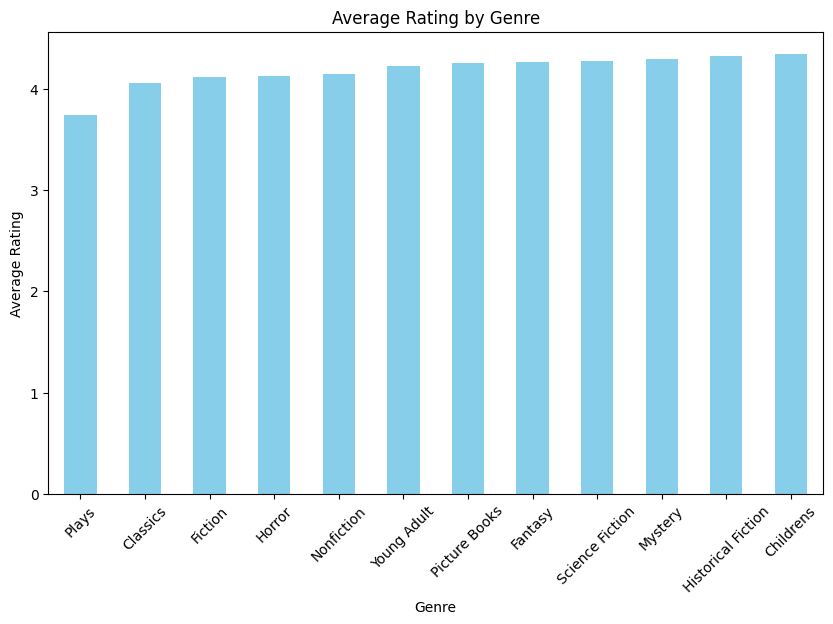

In [63]:
# Calculate the average rating by genre
avg_rating_by_genre = books_df.groupby('genre')['rating'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Scatter Plot: Rating vs. Number of Books per Genre

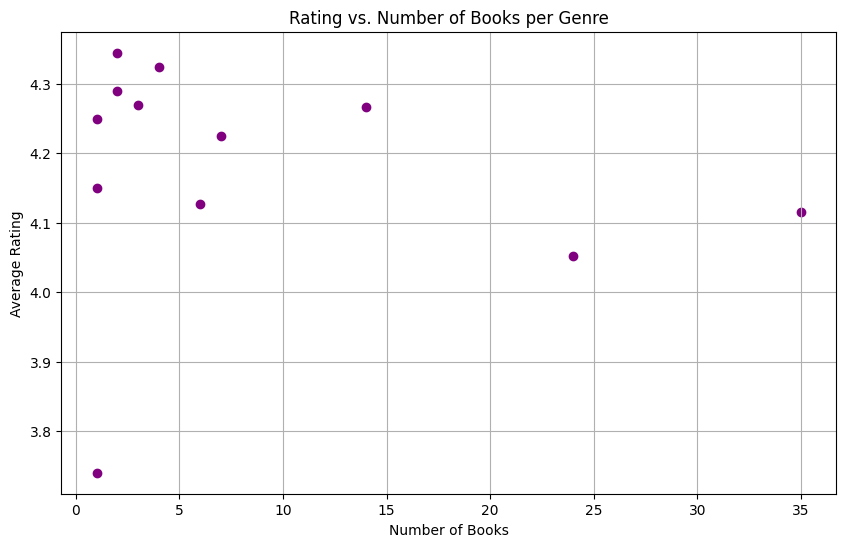

In [57]:
# Calculate the number of books per genre
books_per_genre = books_df['genre'].value_counts()

# Merge the average rating and number of books per genre
genre_stats = pd.DataFrame({
    'average_rating': books_df.groupby('genre')['rating'].mean(),
    'num_books': books_per_genre
}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_stats['num_books'], genre_stats['average_rating'], color='purple')
plt.title('Rating vs. Number of Books per Genre')
plt.xlabel('Number of Books')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the number of books per genre
books_per_genre = books_df['genre'].value_counts()

# Merge the average rating and number of books per genre
genre_stats = pd.DataFrame({
    'average_rating': books_df.groupby('genre')['rating'].mean(),
    'num_books': books_per_genre
}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_stats['num_books'], genre_stats['average_rating'], color='purple')
plt.title('Rating vs. Number of Books per Genre')
plt.xlabel('Number of Books')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


## Histogram: Distribution of Book Ratings

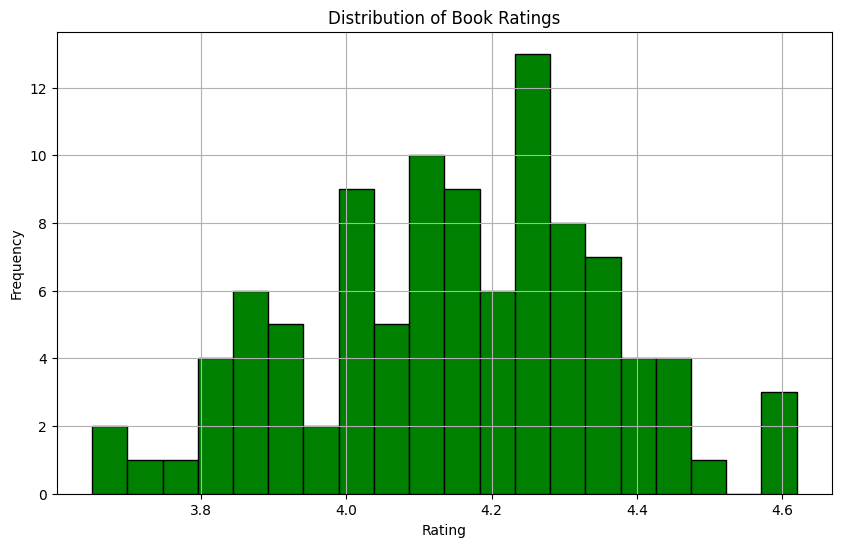

In [59]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(books_df['rating'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Machine Learning

Add a new column named "features" to the DataFrame that combines all of the words in the other columns.

Remove all of the columns except the ones that will be used to quantify similarities between movies.

In [64]:
df = books_df.copy()

df['features'] = df['title'] + ' ' + df['author'] + ' ' + df['genre'] + ' ' + df['description'] 

df.head(2)

,url,title,author,rating,genre,description,features
0,https://www.goodreads.com/...,The Hunger Games,Suzanne Collins,4.34,Young Adult,Could you survive on your ...,The Hunger Games Suzanne C...
1,https://www.goodreads.com/...,Harry Potter and the Order...,J.K. Rowling,4.50,Young Adult,Harry Potter is about to s...,Harry Potter and the Order...


Tokenize and vectorize the text in the DataFrame's "features" column.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=5)
word_matrix = vectorizer.fit_transform(df['features'])
word_matrix.shape

(100, 201)

Compute cosine similarities for all the vector pairs.

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(word_matrix)

In [68]:
sim

array([[1.        , 0.2608746 , 0.04082483, ..., 0.13483997, 0.0372678 ,
        0.        ],
       [0.2608746 , 1.        , 0.06085806, ..., 0.15075567, 0.        ,
        0.06804138],
       [0.04082483, 0.06085806, 1.        , ..., 0.05504819, 0.18257419,
        0.0745356 ],
       ...,
       [0.13483997, 0.15075567, 0.05504819, ..., 1.        , 0.15075567,
        0.        ],
       [0.0372678 , 0.        , 0.18257419, ..., 0.15075567, 1.        ,
        0.13608276],
       [0.        , 0.06804138, 0.0745356 , ..., 0.        , 0.13608276,
        1.        ]])

## Generate book  recommendations

Define a function that takes a book title as input and returns a list of similar books, and then use that function to make some recommendations.

In [80]:
df.head()

,url,title,author,rating,genre,description,features
0,https://www.goodreads.com/...,The Hunger Games,Suzanne Collins,4.34,Young Adult,Could you survive on your ...,The Hunger Games Suzanne C...
1,https://www.goodreads.com/...,Harry Potter and the Order...,J.K. Rowling,4.50,Young Adult,Harry Potter is about to s...,Harry Potter and the Order...
2,https://www.goodreads.com/...,Pride and Prejudice,Jane Austen,4.29,Fiction,Since its immediate succes...,Pride and Prejudice Jane A...
3,https://www.goodreads.com/...,To Kill a Mockingbird,Harper Lee,4.26,Classics,The unforgettable novel of...,To Kill a Mockingbird Harp...
4,https://www.goodreads.com/...,The Book Thief,Markus Zusak,4.39,Historical Fiction,Librarian's note: An alter...,The Book Thief Markus Zusa...


In [92]:
def get_recommendations(title, df, sim, count=10):
    # Get the row index of the specified title in the DataFrame
    index = df.index[df['title'].str.lower() == title.lower()]
    
    # Return an empty list if there is no entry for the specified title
    if (len(index) == 0):
        return []

    # Get the corresponding row in the similarity matrix
    similarities = list(enumerate(sim[index[0]]))
    
    # Sort the similarity scores in that row in descending order
    recommendations = sorted(similarities, key=lambda x: x[1], reverse=True)
    
    # Get the top n recommendations, ignoring the first entry in the list since
    # it corresponds to the title itself (and thus has a similarity of 1.0)
    top_recs = recommendations[1:count + 1]

    # Generate a list of titles from the indexes in top_recs
    titles = []
    descriptions = []
    urls = []

    for i in range(len(top_recs)):
        title = df.iloc[top_recs[i][0]]['title']
        description = df.iloc[top_recs[i][0]]['description']
        url = df.iloc[top_recs[i][0]]['url']

        titles.append(title)
        descriptions.append(description)
        urls.append(url)
    
    # Create DataFrame
    recommendations = pd.DataFrame({
        'Title': titles,
        'Description': descriptions,
        'Url': urls
    })

    return recommendations

Use the `get_recommendations` function to identify 10 books that are similar to the chosen title

In [91]:
get_recommendations('The Hunger Games', df, sim)

,Title,description,url
0,Divergent,In Beatrice Prior's dystop...,https://www.goodreads.com/...
1,My Sister’s Keeper,New York Times best-sellin...,https://www.goodreads.com/...
2,Romeo and Juliet,"In Romeo and Juliet, Shake...",https://www.goodreads.com/...
3,Harry Potter and the Order...,Harry Potter is about to s...,https://www.goodreads.com/...
4,Anne of Green Gables,This heartwarming story ha...,https://www.goodreads.com/...
5,A Thousand Splendid Suns,Mariam is only fifteen whe...,https://www.goodreads.com/...
6,The Giver,"At the age of twelve, Jona...",https://www.goodreads.com/...
7,Rebecca,"""Last night I dreamt I wen...",https://www.goodreads.com/...
8,Outlander,The year is 1945. Claire R...,https://www.goodreads.com/...
9,Water for Elephants,"When Jacob Jankowski, rece...",https://www.goodreads.com/...


# Creating a Dashboard in Plotly Dash 

In [95]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import dash_bootstrap_components as dbc
import pandas as pd


total_genre = books_df['genre'].nunique()
total_books = books_df.shape[0]
most_rated = books_df.sort_values(by='rating', ascending=False).head(1)['title'].values[0]
# KPI data
kpi_data = [
    {'label': 'Total Genre', 'value': total_genre},
    {'label': 'Total Books', 'value': total_books},
    {'label': 'Most Rated Book', 'value': most_rated}
]

# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, '/assets/styles.css'], suppress_callback_exceptions=True)

# Sidebar
sidebar = html.Div(
    [
        html.H2("Menu", className="menu-style"),
        html.Hr(),
        dbc.Nav(
            [
                dbc.NavLink("Analysis", href="/", active="exact"),
                dbc.NavLink("Recommendation", href="/recommendation", active="exact"),
            ],
            vertical=True,
            pills=True
        ),
        html.Hr(),
    ],
    className="sidebar"
)

# Header
header = html.Div(
    [
        html.H2("Books Data Analysis and Recommendation System"),
        html.Hr(style={'width': '60%', 'border-color': '#ccc'}),
    ], className="header-style"
)

# Content
content = html.Div(id="page-content", children=[], className="content")

# Footer
footer = html.Div(
    [
        html.P("Jose Mario Costa  |  www.jmcloudpro.com  |  https://github.com/jmdtanalyst/", className="footer-style")
    ]
)

# Layout
app.layout = html.Div([
    dcc.Location(id="url"),
    header,
    sidebar,
    content,
    footer
])

@app.callback(
    Output("page-content", "children"),
    [Input("url", "pathname")]
)
def render_page_content(pathname):
    if pathname == "/":
        return [
            html.H4('Book Analysis', className="title-style"),
            
            html.Div(className='kpi-container', children=[
                html.Div(children=[
                    html.H3(kpi['label'], className='kpi-label'),
                    html.Span(className='kpi-value', children=kpi['value']),
                ], className='kpi-box')
                for kpi in kpi_data
            ]),
            
            # Dropdown for selecting genre
            html.Div([
                html.Label("Select Genre:"),
                dcc.Dropdown(
                    id='genre-dropdown',
                    options=[{'label': genre, 'value': genre} for genre in books_df['genre'].unique()],
                    value=books_df['genre'].unique()[0]
                )
            ]),
    
            # Bar chart for average rating by genre
            dcc.Graph(id="rating-bar-chart"),
            
            # New chart for rating distribution by genre
            dcc.Graph(id="rating-distribution-chart"),
        ]
    elif pathname == "/recommendation":
        return [
            html.H4('Book Recommendation', className="title-style"),
            # Dropdown for selecting book
            html.Div([
                html.Label("Select the Book:"),
                dcc.Dropdown(
                    id='book-dropdown',
                    options=[{'label': book, 'value': book} for book in books_df['title'].unique()],
                    value=books_df['title'].unique()[0]
                )
            ]),
            # Table for book details
            html.Div(id='book-details-table')
        ]
    
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )

# Callback to update the bar chart based on selected genre
@app.callback(
    Output('rating-bar-chart', 'figure'),
    Input('genre-dropdown', 'value')
)
def update_bar_chart(selected_genre):
    filtered_df = books_df[books_df['genre'] == selected_genre]
    avg_rating_by_genre = filtered_df.groupby('title')['rating'].mean().reset_index()
    fig = px.bar(avg_rating_by_genre, x='title', y='rating', title=f'Average Rating for {selected_genre} Books')
    return fig

# New callback to update the rating distribution chart based on selected genre
@app.callback(
    Output('rating-distribution-chart', 'figure'),
    Input('genre-dropdown', 'value')
)
def update_distribution_chart(selected_genre):
    filtered_df = books_df[books_df['genre'] == selected_genre]
    fig = px.histogram(filtered_df, x='rating', nbins=10, title=f'Rating Distribution for {selected_genre} Books')
    return fig

# New callback to update the book details table based on selected book
@app.callback(
    Output('book-details-table', 'children'),
    Input('book-dropdown', 'value')
)
def update_book_details(selected_book):
    
    book_details = get_recommendations(selected_book, df, sim)
    
    return dbc.Table.from_dataframe(book_details[['Title', 'Description', 'Url']], striped=True, bordered=True, hover=True)
 
if __name__ == '__main__':
    app.run_server(debug=True, port=80)


The system does a pretty credible job of picking similar books.

## References
* Applied Machine Learning and AI for Engineers, Jeff Prosise, O'Reilly Media, Inc., November 2022, 425 pages.